## Data & Analytics - Proyecto Final
Ana Lucía Palacios De La Borda

In [ ]:
Realizado en solitario por Emmanuel de Jesús Muñoz Tapia

## Caso de uso

HR Analytics: https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/

## Importación de librerías

In [6]:
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

seed = 2020
sns.set()

Se utiliza la librería warnings para evitar que se muestren alertas al crear nuevas columnas

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
pd.__version__

'2.2.2'

In [11]:
np.__version__

'1.26.4'

In [13]:
sklearn.__version__

'1.5.1'

## Lectura de datos

In [21]:
df_hr = pd.read_csv('hr_analytics.csv')

In [23]:
df_hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [2]:
id_columns = 'employee_id'
target = 'is_promoted'

## Exploración

In [75]:
nom_col = df_hr.columns
nom_col

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [31]:
df_hr.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [35]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [58]:
df_hr.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


## Valores nulos

Cuenta y porcentaje de nulos

In [12]:
df_hr.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [58]:
total = df_hr.isnull().sum().sort_values(ascending=False)
porcentaje = (df_hr.isnull().sum() / df_hr.isnull().count()).sort_values(ascending=False)
datos_faltantes = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])
print(datos_faltantes)

                      Total  Porcentaje
previous_year_rating   4124    0.075244
education              2409    0.043953
employee_id               0    0.000000
department                0    0.000000
region                    0    0.000000
gender                    0    0.000000
recruitment_channel       0    0.000000
no_of_trainings           0    0.000000
age                       0    0.000000
length_of_service         0    0.000000
KPIs_met >80%             0    0.000000
awards_won?               0    0.000000
avg_training_score        0    0.000000
is_promoted               0    0.000000


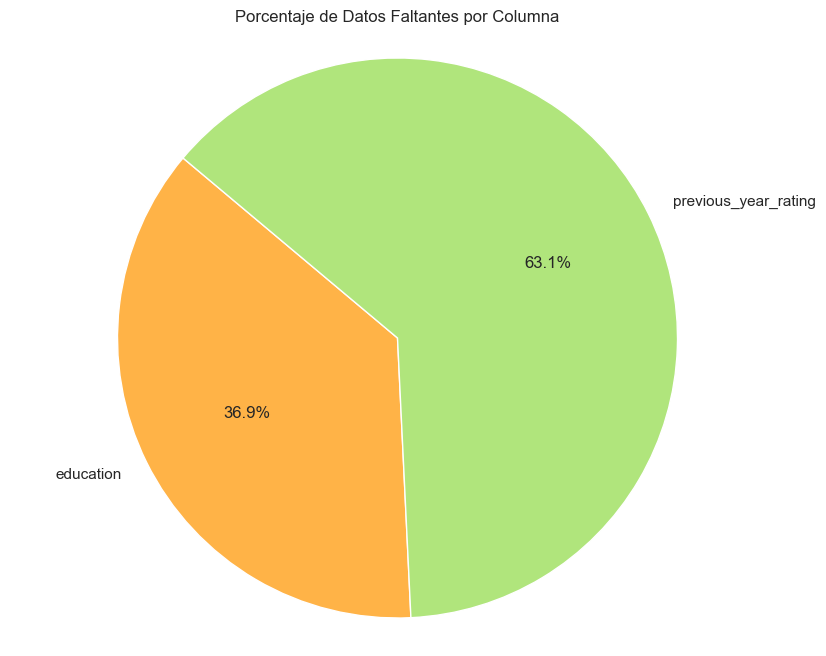

In [76]:
# Calcular el porcentaje de datos faltantes
missing_data = df_hr.isnull().sum()
total_data = len(df_hr)
missing_percentage = (missing_data / total_data) * 100

# Filtrar columnas con datos faltantes
missing_percentage = missing_percentage[missing_percentage > 0]

# Crear la gráfica de pastel con colores pastel diferentes
colors = ['#ffb347', '#b0e57c', '#ffcccb', '#c6e2ff', '#fdfd96']  # Colores pastel diferentes
plt.figure(figsize=(10, 8))
plt.pie(missing_percentage, labels=missing_percentage.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Datos Faltantes por Columna')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

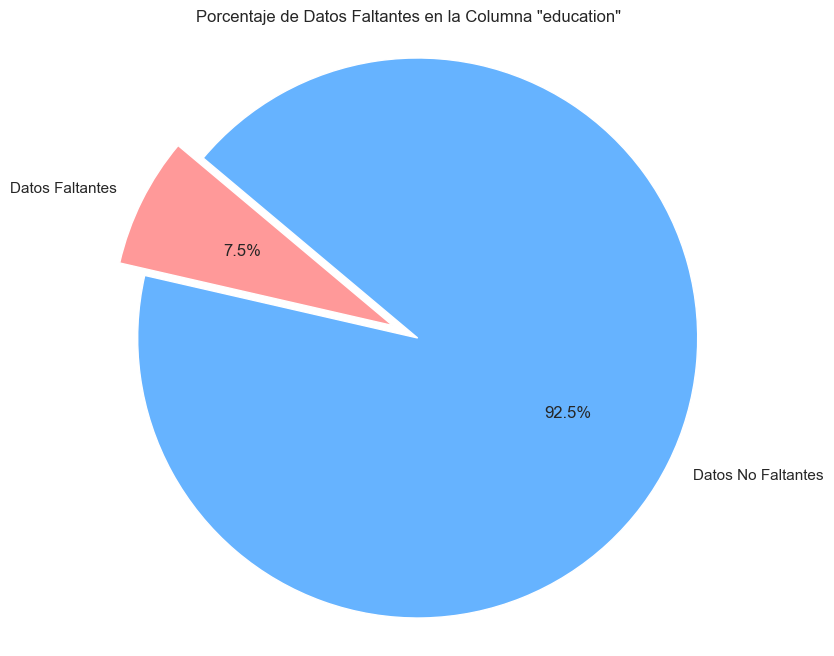

In [66]:
missing_count = df_hr['previous_year_rating'].isnull().sum()
total_count = len(df_hr)
missing_percentage = (missing_count / total_count) * 100
non_missing_percentage = 100 - missing_percentage

# Crear la gráfica de pastel
labels = ['Datos Faltantes', 'Datos No Faltantes']
sizes = [missing_percentage, non_missing_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # resaltar la porción de datos faltantes

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Datos Faltantes en la Columna "education"')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

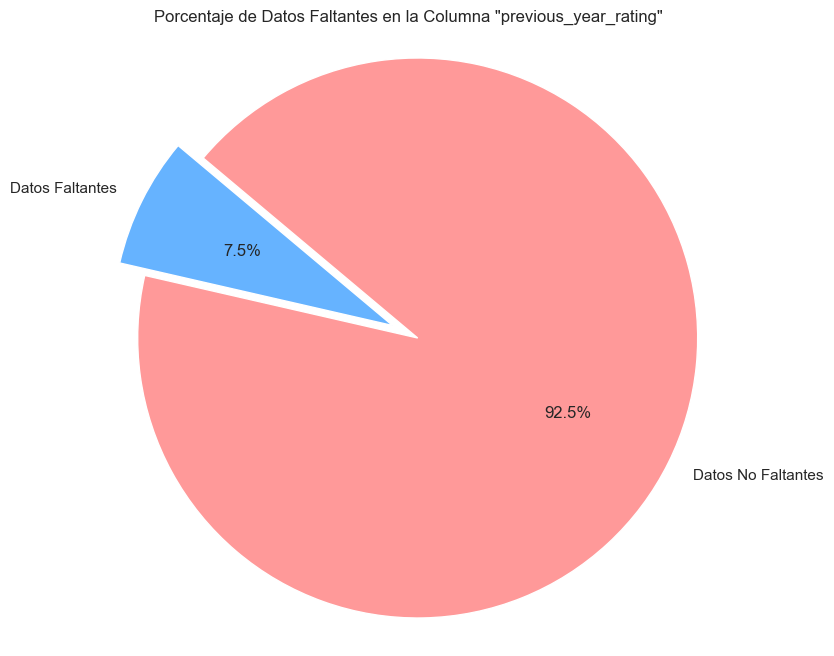

In [68]:
# Calcular el porcentaje de datos faltantes en la columna 'education'
missing_count = df_hr['previous_year_rating'].isnull().sum()
total_count = len(df_hr)
missing_percentage = (missing_count / total_count) * 100
non_missing_percentage = 100 - missing_percentage

# Crear la gráfica de pastel
labels = ['Datos Faltantes', 'Datos No Faltantes']
sizes = [missing_percentage, non_missing_percentage]
colors = ['#66b3ff', '#ff9999']  # Colores invertidos
explode = (0.1, 0)  # resaltar la porción de datos faltantes

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Datos Faltantes en la Columna "previous_year_rating"')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

Descriptivos de numéricas

In [70]:
df_hr.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Descriptivos de categóricas

In [15]:
df_hr.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


Cuentas de valores únicos en variables categóricas

In [72]:
df_hr['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [74]:
df_hr['region'].value_counts()

region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64

Manejo de valores nulos

In [ ]:
# Manejo de valores nulos
# Llenar valores nulos en 'education' con la moda (valor más frecuente)
df_hr['education'].fillna(df_hr['education'].mode()[0], inplace=True)

# Llenar valores nulos en 'previous_year_rating' con la mediana (para mantener la distribución)
df_hr['previous_year_rating'].fillna(df_hr['previous_year_rating'].median(), inplace=True)

# Verificar si aún hay valores nulos
valores_faltantes = df_hr.isnull().sum()

# Distribución de la variable objetivo ('si_es_promovido')
promocion_distribucion = df_hr['is_promoted'].value_counts(normalize=True)

missing_values, promocion_distribucion


## Proporción de target

`value_counts()`

In [134]:
target

'is_promoted'

In [136]:
df_hr[target].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

`mean()`

Proporción de target

In [138]:
df_hr[target].mean()

0.08517004816815063

# Preprocesamiento

## Train y Test

In [177]:
df_hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [179]:
X = df_hr.drop(target, axis = 1).drop(id_columns, axis = 1)
y = df_hr[target]

In [181]:
X.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [183]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [185]:
from sklearn.model_selection import train_test_split

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = seed)

ratio de target en train y val

In [190]:
X_train.shape, y_train.shape

((43846, 12), (43846,))

In [192]:
X_test.shape, y_test.shape

((10962, 12), (10962,))

In [194]:
y_train.mean(), y_test.mean()

(0.08516170232176254, 0.08520343003101624)

## Imputación de datos

Vamos a imputar los valores nulos

* En el caso de las variables continuas imputamos con la mediana
* En el caso de las variables categóricas imputamos con la moda

In [198]:
X_train.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
35058,Operations,region_15,Bachelor's,m,sourcing,1,39,5.0,4,1,0,59
16253,Procurement,region_17,Master's & above,f,sourcing,1,47,3.0,3,0,0,67


Hay columnas con valores nulos en nuestro conjunto de datos

In [217]:
X_train.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [164]:
X_train['previous_year_rating'].value_counts()

previous_year_rating
3.0    18136
5.0     9441
4.0     7915
1.0     4976
2.0     3378
Name: count, dtype: int64

In [166]:
X_train['previous_year_rating'].value_counts(dropna = False)

previous_year_rating
3.0    18136
5.0     9441
4.0     7915
1.0     4976
2.0     3378
Name: count, dtype: int64

In [168]:
np.mean(X_train['previous_year_rating'])

3.3071431829585367

In [219]:
np.median(X_train['previous_year_rating'].dropna())

3.0

In [221]:
X_train['education'].value_counts(dropna = False)

education
Bachelor's          31265
Master's & above    11957
Below Secondary       624
Name: count, dtype: int64

Separamos las variables categóricas de las numéricas

In [223]:
X_train.select_dtypes('number').head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
35058,1,39,5.0,4,1,0,59
16253,1,47,3.0,3,0,0,67
27130,1,58,3.0,28,0,0,71
12559,1,28,4.0,4,0,0,49
14163,1,39,3.0,9,0,0,81


In [225]:
X_train.select_dtypes('object').head()

,department,region,education,gender,recruitment_channel
35058,Operations,region_15,Bachelor's,m,sourcing
16253,Procurement,region_17,Master's & above,f,sourcing
27130,Procurement,region_2,Bachelor's,f,other
12559,Sales & Marketing,region_13,Bachelor's,m,other
14163,Technology,region_20,Master's & above,m,sourcing


In [227]:
X_train_num = X_train.select_dtypes('number')
X_train_cat = X_train.select_dtypes('object')

In [229]:
X_train_num.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
35058,1,39,5.0,4,1,0,59
16253,1,47,3.0,3,0,0,67
27130,1,58,3.0,28,0,0,71
12559,1,28,4.0,4,0,0,49
14163,1,39,3.0,9,0,0,81


In [231]:
X_train_cat.head()

,department,region,education,gender,recruitment_channel
35058,Operations,region_15,Bachelor's,m,sourcing
16253,Procurement,region_17,Master's & above,f,sourcing
27130,Procurement,region_2,Bachelor's,f,other
12559,Sales & Marketing,region_13,Bachelor's,m,other
14163,Technology,region_20,Master's & above,m,sourcing


`SimpleImputer` https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [233]:
from sklearn.impute import SimpleImputer

In [237]:
imputer = SimpleImputer(strategy = 'median')

In [239]:
X_train_num.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [241]:
imputer.fit_transform(X_train_num)

array([[ 1., 39.,  5., ...,  1.,  0., 59.],
       [ 1., 47.,  3., ...,  0.,  0., 67.],
       [ 1., 58.,  3., ...,  0.,  0., 71.],
       ...,
       [ 1., 34.,  5., ...,  0.,  0., 49.],
       [ 1., 30.,  3., ...,  0.,  0., 81.],
       [ 2., 36.,  5., ...,  0.,  0., 63.]])

In [243]:
pd.DataFrame(data = imputer.fit_transform(X_train_num), columns = X_train_num.columns)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.0,39.0,5.0,4.0,1.0,0.0,59.0
1,1.0,47.0,3.0,3.0,0.0,0.0,67.0
2,1.0,58.0,3.0,28.0,0.0,0.0,71.0
3,1.0,28.0,4.0,4.0,0.0,0.0,49.0
4,1.0,39.0,3.0,9.0,0.0,0.0,81.0
...,...,...,...,...,...,...,...
43841,1.0,24.0,4.0,2.0,0.0,0.0,81.0
43842,1.0,34.0,5.0,5.0,1.0,0.0,62.0
43843,1.0,34.0,5.0,8.0,0.0,0.0,49.0
43844,1.0,30.0,3.0,3.0,0.0,0.0,81.0


In [245]:
X_train_num_imputed = pd.DataFrame(data = imputer.fit_transform(X_train_num), columns = X_train_num.columns)

In [247]:
X_train_num_imputed.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [249]:
imputer_num = SimpleImputer(strategy= 'median')
imputer_cat = SimpleImputer(strategy= 'most_frequent')

In [251]:
X_train_num_imputed = imputer_num.fit_transform(X_train_num)
X_train_cat_imputed = imputer_cat.fit_transform(X_train_cat)

In [253]:
X_train_num_imputed = pd.DataFrame(data = X_train_num_imputed, columns = X_train_num.columns)
X_train_cat_imputed = pd.DataFrame(data = X_train_cat_imputed, columns = X_train_cat.columns)

In [255]:
X_train_num_imputed.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.0,39.0,5.0,4.0,1.0,0.0,59.0
1,1.0,47.0,3.0,3.0,0.0,0.0,67.0


In [257]:
X_train_cat_imputed.head(2)

,department,region,education,gender,recruitment_channel
0,Operations,region_15,Bachelor's,m,sourcing
1,Procurement,region_17,Master's & above,f,sourcing


In [259]:
X_train_num_imputed.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [261]:
X_train_cat_imputed.isnull().sum()

department             0
region                 0
education              0
gender                 0
recruitment_channel    0
dtype: int64

Ya no tenemos valores nulos!

## Capeo de outliers (variables numéricas)

Observamos la distribución de los percentiles más bajos

In [266]:
X_train_num_imputed.describe(percentiles = [0.05, 0.10, 0.15, 0.20, 0.25])

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000
mean,1.251950,34.820873,3.307143,5.873649,0.352050,0.022921,63.383957
std,0.610654,7.673484,1.215935,4.281273,0.477615,0.149654,13.356721
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,40.000000
5%,1.000000,25.000000,1.000000,1.000000,0.000000,0.000000,47.000000
10%,1.000000,27.000000,1.000000,2.000000,0.000000,0.000000,48.000000
15%,1.000000,28.000000,2.000000,2.000000,0.000000,0.000000,49.000000
20%,1.000000,28.000000,3.000000,2.000000,0.000000,0.000000,50.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000


Lo mismo para los percentiles más altos

In [269]:
X_train_num_imputed.describe(percentiles = [0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000
mean,1.251950,34.820873,3.307143,5.873649,0.352050,0.022921,63.383957
std,0.610654,7.673484,1.215935,4.281273,0.477615,0.149654,13.356721
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,40.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
90%,2.000000,46.000000,5.000000,11.000000,1.000000,0.000000,83.000000
91%,2.000000,47.000000,5.000000,12.000000,1.000000,0.000000,84.000000
92%,2.000000,48.000000,5.000000,12.000000,1.000000,0.000000,84.000000
93%,2.000000,49.000000,5.000000,13.000000,1.000000,0.000000,85.000000
94%,2.000000,50.000000,5.000000,14.000000,1.000000,0.000000,85.000000


Utilizamos el p99 para capear los valores más altos

<Axes: xlabel='length_of_service', ylabel='count'>

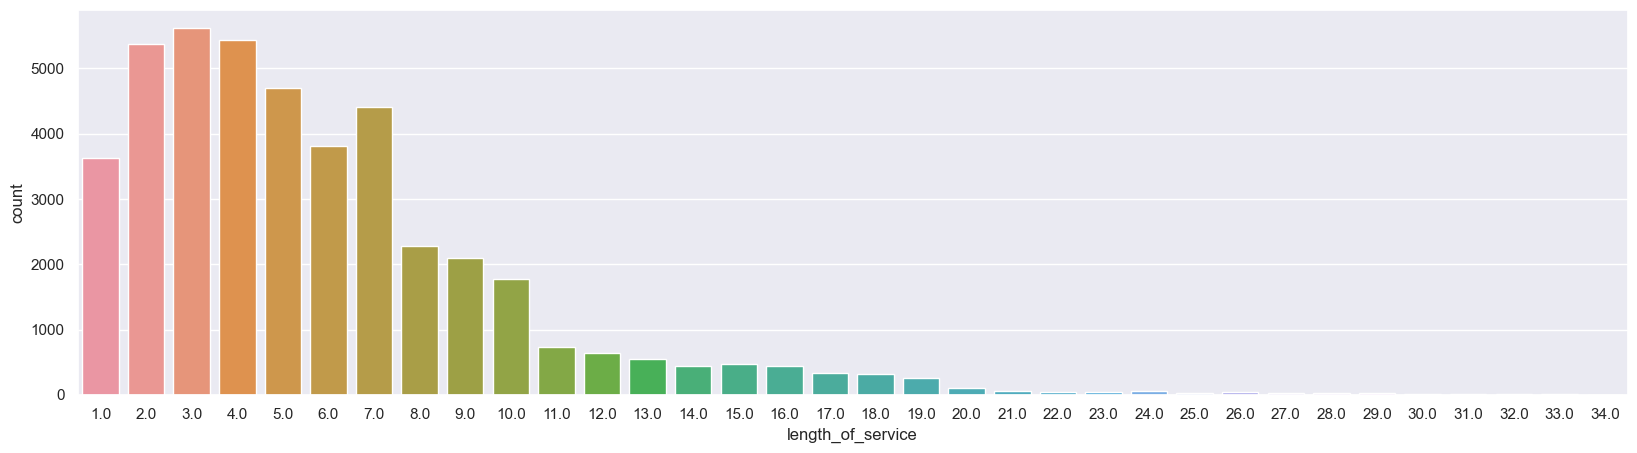

In [43]:
plt.figure(figsize = (20, 5))
sns.countplot(data = X_train_num_imputed, x = 'length_of_service')

In [272]:
a = np.array([-10,10,20,30,40,50,60,70,1000])
a

array([ -10,   10,   20,   30,   40,   50,   60,   70, 1000])

In [274]:
np.clip(a, 0 , 100)

array([  0,  10,  20,  30,  40,  50,  60,  70, 100])

In [276]:
np.percentile(X_train_num_imputed['length_of_service'], 99)

20.0

In [278]:
np.percentile(X_train_num_imputed['length_of_service'], 0)

1.0

In [280]:
columna ='length_of_service'

p0 = np.percentile(X_train_num_imputed[columna], 0)
p99 = np.percentile(X_train_num_imputed[columna], 99)

In [282]:
X_train_num_imputed[columna] = np.clip(X_train_num_imputed[columna], p0, p99)

<Axes: xlabel='length_of_service', ylabel='count'>

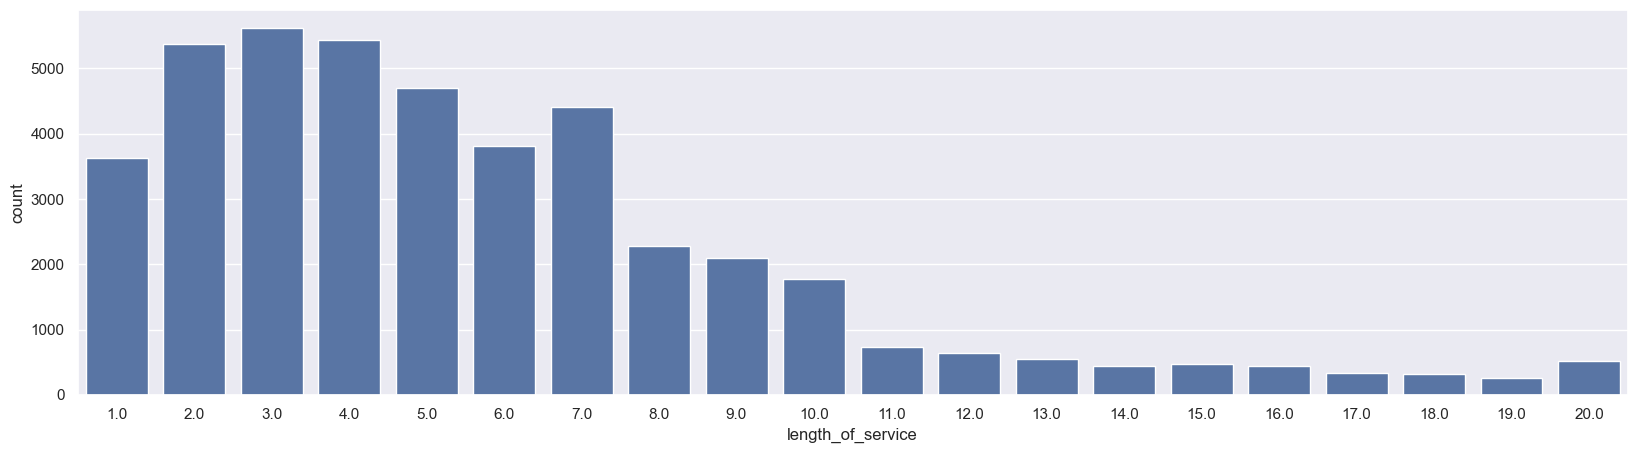

In [284]:
plt.figure(figsize = (20, 5))
sns.countplot(data = X_train_num_imputed, x = 'length_of_service')

In [286]:
X_train_num_imputed.describe(percentiles = np.arange(0.9, 1, 0.01))

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000
mean,1.251950,34.820873,3.307143,5.824522,0.352050,0.022921,63.383957
std,0.610654,7.673484,1.215935,4.072022,0.477615,0.149654,13.356721
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,40.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
90%,2.000000,46.000000,5.000000,11.000000,1.000000,0.000000,83.000000
91%,2.000000,47.000000,5.000000,12.000000,1.000000,0.000000,84.000000
92%,2.000000,48.000000,5.000000,12.000000,1.000000,0.000000,84.000000
93%,2.000000,49.000000,5.000000,13.000000,1.000000,0.000000,85.000000
94%,2.000000,50.000000,5.000000,14.000000,1.000000,0.000000,85.000000


## Generación de dummies

Aplicamos one hot encoding a las variables categóricas

In [290]:
X_train_cat_imputed.head()

,department,region,education,gender,recruitment_channel
0,Operations,region_15,Bachelor's,m,sourcing
1,Procurement,region_17,Master's & above,f,sourcing
2,Procurement,region_2,Bachelor's,f,other
3,Sales & Marketing,region_13,Bachelor's,m,other
4,Technology,region_20,Master's & above,m,sourcing


In [292]:
pd.get_dummies(X_train_cat_imputed.head())

,department_Operations,department_Procurement,department_Sales & Marketing,department_Technology,region_region_13,region_region_15,region_region_17,region_region_2,region_region_20,education_Bachelor's,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_sourcing
0,True,False,False,False,False,True,False,False,False,True,False,False,True,False,True
1,False,True,False,False,False,False,True,False,False,False,True,True,False,False,True
2,False,True,False,False,False,False,False,True,False,True,False,True,False,True,False
3,False,False,True,False,True,False,False,False,False,True,False,False,True,True,False
4,False,False,False,True,False,False,False,False,True,False,True,False,True,False,True


In [294]:
pd.get_dummies(X_train_cat_imputed.head(), drop_first=True)

,department_Procurement,department_Sales & Marketing,department_Technology,region_region_15,region_region_17,region_region_2,region_region_20,education_Master's & above,gender_m,recruitment_channel_sourcing
0,False,False,False,True,False,False,False,False,True,True
1,True,False,False,False,True,False,False,True,False,True
2,True,False,False,False,False,True,False,False,False,False
3,False,True,False,False,False,False,False,False,True,False
4,False,False,True,False,False,False,True,True,True,True


In [296]:
X_train_cat_dummies = pd.get_dummies(X_train_cat_imputed, drop_first=True)

In [298]:
X_train_cat_dummies.head()

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,True


## Consolidación

In [301]:
X_train_total = pd.concat([X_train_num_imputed, X_train_cat_dummies], axis = 1)

In [303]:
X_train_total.shape

(43846, 53)

In [305]:
X_train_total.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1.0,39.0,5.0,4.0,1.0,0.0,59.0,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,1.0,47.0,3.0,3.0,0.0,0.0,67.0,False,False,False,...,False,False,False,False,False,False,True,False,False,True


## Escalamiento

In [308]:
from sklearn.preprocessing import MinMaxScaler

In [310]:
scaler = MinMaxScaler()

In [312]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_total), columns = X_train_total.columns)
X_train_scaled.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0.0,0.475,1.0,0.157895,1.0,0.0,0.322034,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.675,0.5,0.105263,0.0,0.0,0.457627,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [314]:
X_train_scaled.shape

(43846, 53)

## Replicar el preprocesamiento en la data de test

In [317]:
X_test.shape

(10962, 12)

In [319]:
X_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
9351,Procurement,region_23,Bachelor's,m,other,1,27,4.0,2,0,0,69
7289,Procurement,region_15,Master's & above,m,other,1,45,3.0,18,0,0,67
22339,Analytics,region_32,Bachelor's,m,other,2,36,2.0,3,0,0,82
23422,Technology,region_1,Bachelor's,f,sourcing,1,28,5.0,5,1,0,75
36639,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,34,2.0,10,1,0,52


imputación

In [322]:
X_test_num = X_test.select_dtypes('number')
X_test_cat = X_test.select_dtypes('object')

In [324]:
X_test_num_imputed = imputer_num.transform(X_test_num)
X_test_cat_imputed = imputer_cat.transform(X_test_cat)

In [326]:
X_test_num_imputed = pd.DataFrame(data = X_test_num_imputed, columns = X_test_num.columns)
X_test_cat_imputed = pd.DataFrame(data = X_test_cat_imputed, columns = X_test_cat.columns)

Capeo de outliers

In [329]:
columna = 'length_of_service'

X_test_num_imputed[columna] = np.clip(X_test_num_imputed[columna], p0, p99)

Generación de dummies

In [332]:
X_test_cat_dummies = pd.get_dummies(X_test_cat_imputed, drop_first=True)

Consolidación

In [335]:
X_test_total = pd.concat([X_test_num_imputed, X_test_cat_dummies], axis = 1)

Escalamiento

In [338]:
X_test_scaled = pd.DataFrame(data = scaler.transform(X_test_total), columns = X_test_total.columns)
X_test_scaled.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0.000000,0.175,0.75,0.052632,0.0,0.0,0.491525,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.625,0.50,0.894737,0.0,0.0,0.457627,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.111111,0.400,0.25,0.105263,0.0,0.0,0.711864,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.200,1.00,0.210526,1.0,0.0,0.593220,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.350,0.25,0.473684,1.0,0.0,0.203390,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [340]:
X_test_scaled.shape

(10962, 53)

## Guardar datasets preprocesados

In [369]:
X_train_export = X_train_scaled.copy()
X_test_export = X_test_scaled.copy()

In [371]:
X_train_export[target] = y_train.values
X_test_export[target] = y_test.values

In [347]:
X_train_export.to_csv('preprocessed/preprocessed_train.csv', index = False)
X_test_export.to_csv('preprocessed/preprocessed_test.csv', index = False)

OSError: Cannot save file into a non-existent directory: 'preprocessed'

## Balanceo

In [373]:
import imblearn

In [375]:
imblearn.__version__

'0.12.3'

In [377]:
y_train.value_counts()

is_promoted
0    40112
1     3734
Name: count, dtype: int64

In [379]:
y_train.mean()

0.08516170232176254

In [381]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [383]:
ros = RandomOverSampler(sampling_strategy = 0.25)

In [385]:
X_ros, y_ros = ros.fit_resample(X_train_scaled, y_train)

In [387]:
y_train.value_counts()

is_promoted
0    40112
1     3734
Name: count, dtype: int64

In [389]:
y_ros.value_counts()

is_promoted
0    40112
1    10028
Name: count, dtype: int64

### Exportar datasets balanceados

In [397]:
X_train_export = X_ros.copy()
X_train_export[target] = y_ros.values

X_train_export.to_csv('preprocessed/preprocessed_train_20.csv', index = False)

OSError: Cannot save file into a non-existent directory: 'preprocessed'